In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('HR data.csv')
data.head(5)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [ ]:
data.shape

(14999, 10)

In [ ]:
left=data[data.left==1] # checking the left coulmn from our data. Those left are represented as 1
left.shape

(3571, 10)

In [ ]:
retained=data[data.left==0] # calling the retained employees which are reprsented as 0.
retained.shape

(11428, 10)

In [ ]:
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [ ]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 0.2 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:1699: FutureWarning: The `bw` parameter is deprecated in favor 

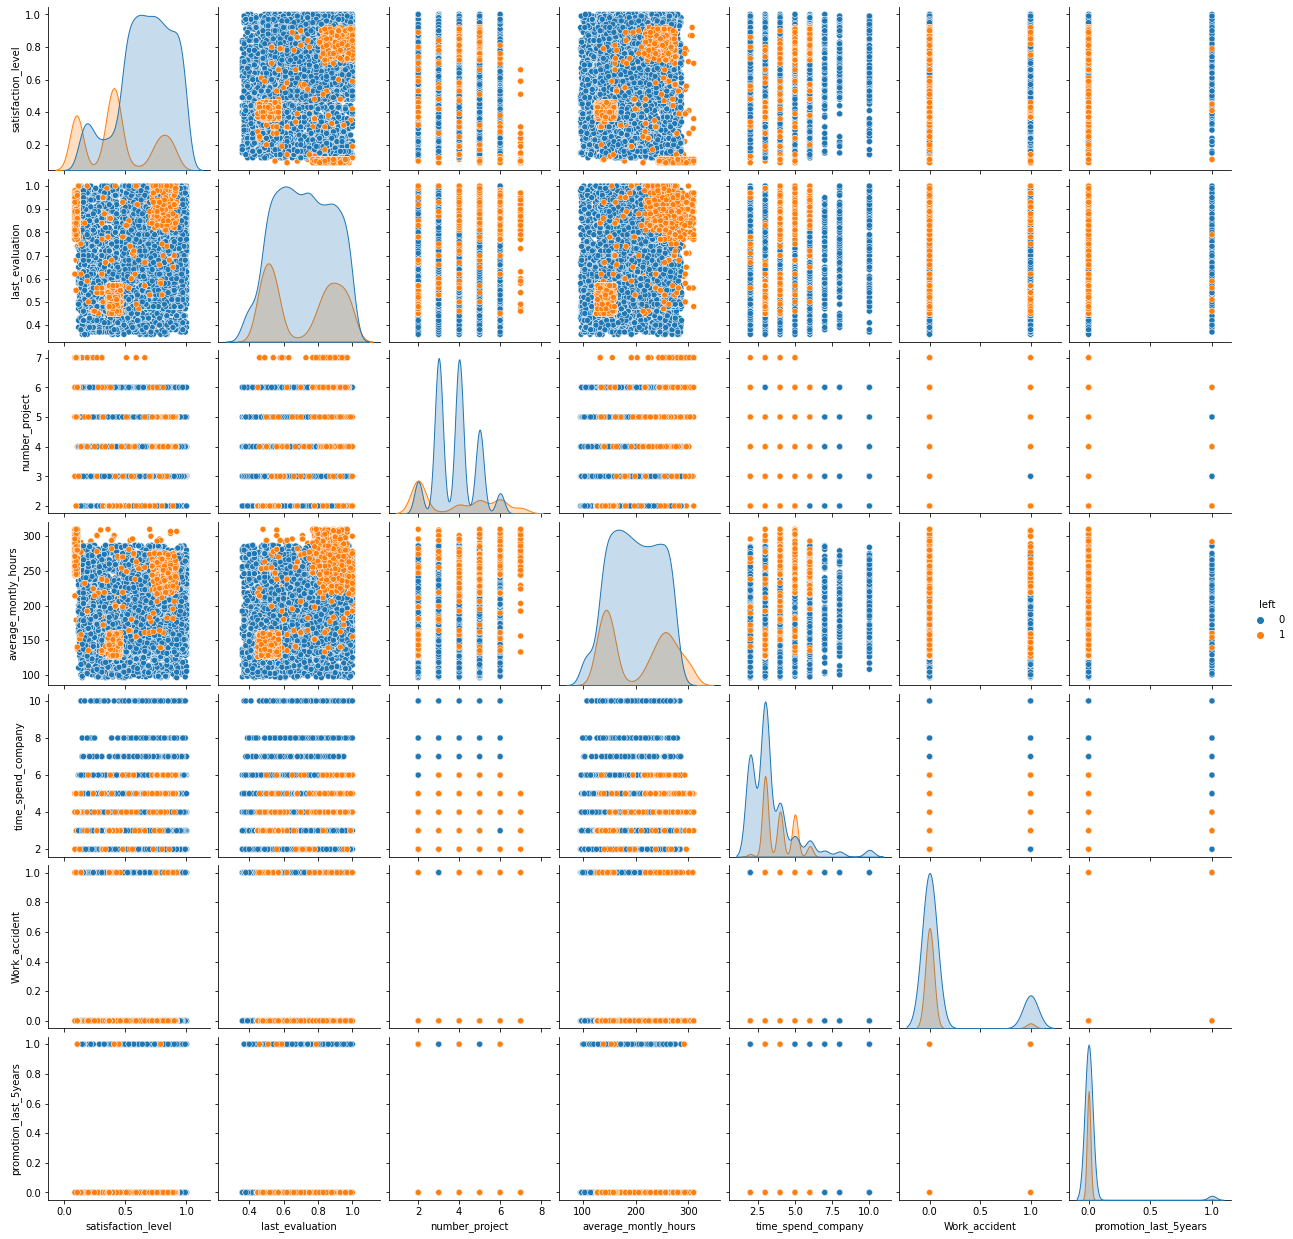

In [ ]:
new_data = data[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 
       'promotion_last_5years', 'Department', 'salary']]

g = sns.pairplot(new_data, hue = 'left', diag_kws={'bw': 0.2})

In [ ]:
data.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,

**Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones (0.66)

**Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207) 

**Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm


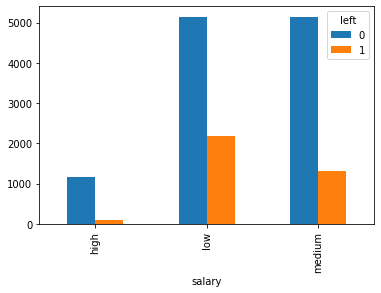

In [ ]:
pd.crosstab(data.salary,data.left).plot(kind='bar') # to see relationship between salary and retention

Above bar chart shows employees with high salaries are likely to not leave the company

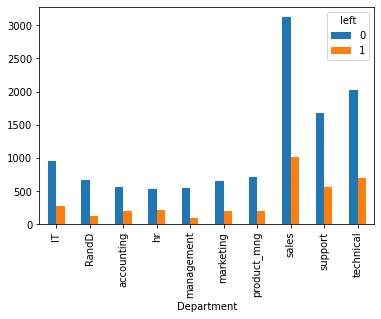

In [ ]:
pd.crosstab(data.Department,data.left).plot(kind='bar')

From the data analysis so far we can conclude that we will use following variables as independant variables in our model. 


**Satisfaction Level**. 

**Average Monthly Hours**

**Promotion Last 5 Years**

**Salary**


In [ ]:
subdata = data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdata.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


Tackle salary dummy variable


Salary has all text data. It needs to be converted to numbers and we will use dummy variable for that. 

In [ ]:
salary_dummies = pd.get_dummies(subdata.salary, prefix="salary")

In [ ]:
data_with_dummies = pd.concat([subdata,salary_dummies],axis='columns')

In [ ]:
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [ ]:
data_with_dummies.drop('salary',axis='columns',inplace=True) # droping the salary column with text characters
data_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X = data_with_dummies #X will be assigned to our features from the scaled data
X.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [ ]:
X.shape

(14999, 6)

In [ ]:
y = data.left # y will be assigned to left feature as target variable

In [ ]:
y.shape

(14999,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.3) # spliting the datat 

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression() # import our model

In [ ]:
model.fit(X_train, y_train) # fit our splited dataset to our model

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
model.score(X_test,y_test)

0.7804761904761904